**Optimizing Job Classification: Addressing Dataset Complexity and Model Performance Challenges**

After phase one (Analyzing & preprocessing dataset), we implemented a supervised machine learning model using two algorithms: Support Vector Machine (SVM) and Neural Network. Despite ensuring accurate preprocessing, the model's performance remained suboptimal, with low accuracy rates.

To address this, we revisited the preprocessing stage multiple times, adjusting our strategies to enhance the model's effectiveness. Upon a broader analysis, we identified key issues contributing to the poor performance. Our dataset, comprising 1,116 entries, was relatively small for the complexity of the task, especially given the high variance and diversity in job titles, skill sets, and job descriptions.

The primary challenge was the vast diversity and large scale of the input features (skill sets and job descriptions) and the output feature (job title), which hindered the model’s ability to learn effectively due to the overfitting and underfitting risks associated with high feature variability in a limited dataset.

To make the learning task feasible, we made several strategic adjustments:

Simplification of Output Labels: We replaced the diverse job titles with broader job categories, which are(HR, Information Technology, Sales, Finance, and Business Development). This reduction in output complexity helped decrease the variability in labels, simplifying the classification task.

Reduction of Input Features: We condensed the array of skill sets and job descriptions to the top 10 relevant terms. This step focused the model on the most significant features, reducing the impact of less relevant or noisy data and enhancing the learning process by simplifying the input space.

Enhanced Data Cleaning: Further cleaning and preprocessing were conducted to refine the input features and ensure a more robust dataset for training. This was crucial for improving the signal-to-noise ratio, making patterns in the data more detectable for the learning algorithms.

These modifications aimed to provide a clearer, more structured learning path for the machine learning algorithms, thereby improving the model's accuracy in classifying job categories based on skill sets and job descriptions. By reducing the complexity of both input and output data, we enhanced the model's ability to identify and learn from underlying patterns more effectively.

**Here is the illustration below of why we are reducing job title skill sets and job titles**



In [31]:
import pandas as pd

# Load your datase
df = pd.read_csv(r"C:\Users\almas\AIproject_job_recomndation\Dataset\old_job_dataset.csv")  


df['job_skill_set'] = df['job_skill_set'].apply(lambda x: x.strip("[]").replace("'", "").split(', ') if isinstance(x, str) else [])

df['job_skill_set'] = df['job_skill_set'].apply(tuple)

df['job_description'] = df['job_description'].astype(str)

unique_job_skill_sets = df.groupby('category')['job_skill_set'].nunique()
print("\n Unique Job Skill Sets per Category:\n", unique_job_skill_sets)

unique_job_titles = df.groupby('category')['job_title'].nunique()
print("\n Unique Job Titles per Category:\n", unique_job_titles)

unique_job_descriptions = df.groupby('category')['job_description'].nunique()
print("\nUnique Job Descriptions per Category:\n", unique_job_descriptions)



 Unique Job Skill Sets per Category:
 category
BUSINESS-DEVELOPMENT      239
FINANCE                   236
HR                        220
INFORMATION-TECHNOLOGY    240
SALES                     232
Name: job_skill_set, dtype: int64

 Unique Job Titles per Category:
 category
BUSINESS-DEVELOPMENT      127
FINANCE                   192
HR                         90
INFORMATION-TECHNOLOGY    132
SALES                     182
Name: job_title, dtype: int64

Unique Job Descriptions per Category:
 category
BUSINESS-DEVELOPMENT      239
FINANCE                   236
HR                        220
INFORMATION-TECHNOLOGY    240
SALES                     232
Name: job_description, dtype: int64


**Building a Supervised Learning Model**

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2]:
!pip install torch

^C
  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/11/c5/2370d96b31eb1841c3a0883a492c15278a6718ccad61bb6a649c80d1d9eb/torch-2.6.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for networkx from https://files.pythonhosted.org/packages/b9/54/dd730b32ea14ea797530a4479b2ed46a6fb250f682a9cfb997e968bf0261/networkx-3.4.2-py3-none-any.whl.metadata
  Obtaining dependency information for sympy==1.13.1 from https://files.pythonhosted.org/packages/b2/fe/81695a1aa331a842b582453b605175f419fe8540355886031328089d840a/sympy-1.13.1-py3-none-any.whl.metadata
  Obtaining dependency information for mpmath<1.4,>=1.1.0 from https://files.pythonhosted.org/packages/43/e3/7d92a15f894aa0c9c4b49b8ee9ac9850d6e63b03c9c32c0367a13ae62209/mpmath-1.3.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/204.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/204.2 MB 1.9 MB/s eta 0:01:47
   ---------------------------


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/cf/24/271e77c22724f370c24c705f394b8035b4d27e4c2c6339f3f45ab9b8258e/tensorflow-2.18.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.18.0-cp311-cp311-win_amd64.whl.metadata (3.3 kB)
Using cached tensorflow-2.18.0-cp311-cp311-win_amd64.whl (7.5 kB)



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
import tensorflow as tf
print(tf.__version__)

2.18.0


Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2258 - loss: 5.1213 - val_accuracy: 0.2834 - val_loss: 4.0953
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1914 - loss: 4.9763 - val_accuracy: 0.3209 - val_loss: 3.9735
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2489 - loss: 4.7455 - val_accuracy: 0.3209 - val_loss: 3.8637
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2876 - loss: 4.4150 - val_accuracy: 0.3529 - val_loss: 3.7715
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3093 - loss: 4.4364 - val_accuracy: 0.3743 - val_loss: 3.6894
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2376 - loss: 4.2995 - val_accuracy: 0.4064 - val_loss: 3.6198
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2956 - loss: 4.2904 - val_accuracy: 0.4332 - val_loss: 3.5581
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3609 - loss: 4.0609 - val_accuracy: 0.4439 - val_loss

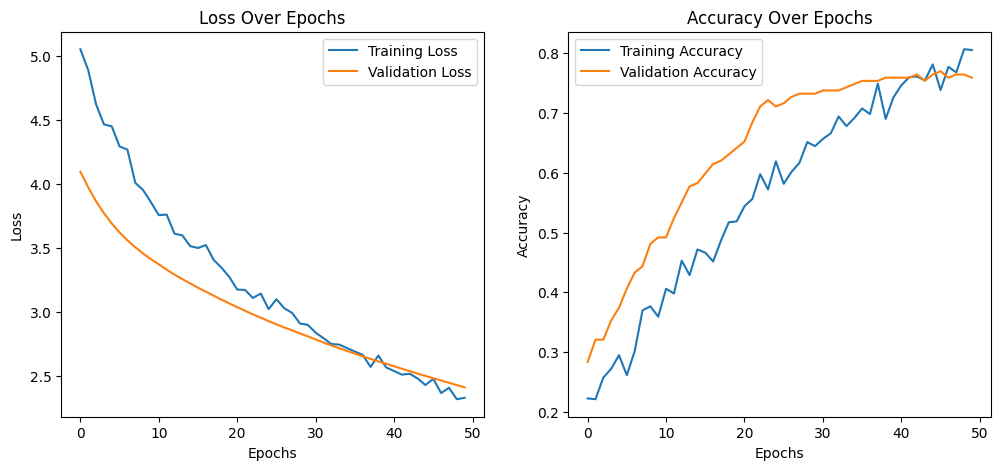

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# Load the transformed dataset
file_path = r"C:\Users\Sara\Desktop\SWE 485-project\Dataset\transformed_job_dataset.csv"
data = pd.read_csv(file_path)

# Extract input features (skills and description) and target (category)
X_skills = data.filter(like='skill_')  # Skill features
X_desc = data.filter(like='desc_')  # Description features
X = pd.concat([X_skills, X_desc], axis=1)  # Combine skill and description features
y = data['category']  # Target variable (category)

# Encode category (if not already encoded)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Encode as integers

# Convert target to one-hot encoding (required for multi-class classification)
num_classes = len(np.unique(y))
y = to_categorical(y, num_classes=num_classes)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Compute class weights (to handle class imbalance)
class_weights = compute_class_weight('balanced', classes=np.unique(np.argmax(y, axis=1)), y=np.argmax(y, axis=1))
class_weights = dict(enumerate(class_weights))

# Build the neural network model
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Input layer
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),  # Hidden layer with L2 regularization
    Dropout(0.5),  # Dropout for regularization
    Dense(64, activation='relu'),  # Additional hidden layer
    Dropout(0.5),  # Dropout for regularization
    Dense(num_classes, activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),  # Lower learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train,
                    epochs=50,  # Increase epochs
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stopping],
                    class_weight=class_weights)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plot training and validation loss/accuracy
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the dataset
data = pd.read_csv(r"C:\Users\almas\AIproject_job_recomndation\Dataset\transformed_job_dataset.csv")

# Selecting the feature columns (job descriptions and skill sets)
feature_columns = [col for col in data.columns if 'desc_' in col or 'skill_' in col]

# Features and Target
X = data[feature_columns]
y = data['category']

# Encoding the categorical target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Create an SVM classifier with a linear kernel
svm_model = SVC(kernel='linear', class_weight='balanced')

# Training the SVM classifier
svm_model.fit(X_train, y_train)

# Predicting the categories
y_pred = svm_model.predict(X_test)

# Evaluating the model
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Evaluation Method 2: K-Fold Cross-Validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(svm_model, X, y_encoded, cv=kfold, scoring='accuracy')


              precision    recall  f1-score   support

           0       1.00      0.88      0.94        42
           1       0.96      0.93      0.95        56
           2       0.70      0.76      0.73        41
           3       0.92      0.91      0.91        53
           4       0.68      0.76      0.72        42

    accuracy                           0.85       234
   macro avg       0.85      0.85      0.85       234
weighted avg       0.86      0.85      0.86       234

Accuracy: 0.8547008547008547

Confusion Matrix:
 [[37  0  0  1  4]
 [ 0 52  0  2  2]
 [ 0  1 31  1  8]
 [ 0  1  3 48  1]
 [ 0  0 10  0 32]]
